In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.metrics import f1_score, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
data = pd.read_csv('H:\DATA\MY\practice\Practice-32\Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape

(891, 12)

In [5]:
data['PassengerId'].nunique()

891

In [6]:
data = data.drop(columns= ['PassengerId','Name'])

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
data = data.drop('Cabin', axis = 1)
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [11]:
print(Counter(data['Survived']))

Counter({0: 549, 1: 342})


C:\Users\mouncef\AppData\Local\Temp\ipykernel_7340\3643516456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

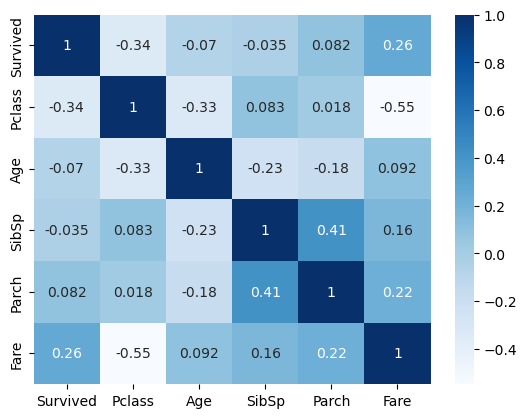

In [12]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')

In [13]:
import category_encoders as ce

X = data.drop('Survived', axis = 1)
Y = data['Survived']

encoder = ce.TargetEncoder()

X = encoder.fit_transform(X, Y)

the accuracy score for the training data :  0.9985955056179775
the accuracy score for the testing data :  0.9888268156424581
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.97      0.99        74

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



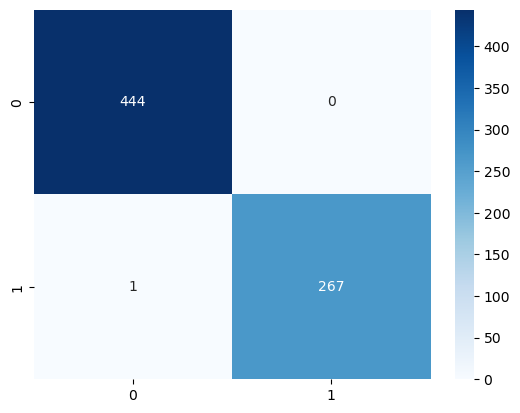

In [14]:
model = RandomForestClassifier(random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

report = classification_report(y_test, y_pred)

sns.heatmap(confusion_matrix(y_train, y_pred_train), annot= True, fmt='d', cmap='Blues')

print('the accuracy score for the training data : ',accuracy_train)
print('the accuracy score for the testing data : ',accuracy)
print(report)

In [15]:
cv_score = cross_val_score(model, X, Y, scoring= 'accuracy')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.98882682 0.97191011 0.98876404 0.97752809 0.98314607]
the mean cross validation score :  0.9820350260498399


In [16]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

report = classification_report(y_test, y_pred)

print('the accuracy score for the training data : ',accuracy_train)
print('the accuracy score for the testing data : ',accuracy)
print(report)

the accuracy score for the training data :  0.8356741573033708
the accuracy score for the testing data :  0.6983240223463687
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       105
           1       0.69      0.49      0.57        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



In [17]:
cv_score = cross_val_score(model, X, Y, scoring = 'accuracy')

print('the cross validation score : ', cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.65363128 0.68539326 0.7247191  0.74157303 0.69662921]
the mean cross validation score :  0.7003891783315549


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'n_neighbors': [3,5,7, 10],
  'weights':['uniform', 'distance'],
  'metric':['euclidean','manhattan','minkowski'],
  'leaf_size':[15, 20, 25, 30, 40]
}

grid_search = GridSearchCV(model, param_grid= param_grid, scoring= 'accuracy', n_jobs = -1)

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)

print('the best parameters : ',grid_search.best_params_)
print('the best accuracy score  : ',grid_search.best_score_)
print('the accuracy for the testing data  : ',accuracy)

the best parameters :  {'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
the best accuracy score  :  0.7528809218950063
the accuracy for the testing data  :  0.7150837988826816


In [61]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

categorical_columns = data.select_dtypes(include=['object','category']).columns.tolist()

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

ctgan = CTGANSynthesizer(metadata=metadata)
ctgan.fit(data)
synthetic_data = ctgan.sample(10000)

synthetic_data.head()

c:\Users\mouncef\anaconda3\Lib\site-packages\sdv\single_table\base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,10.280527,0,2,sdv-pii-iapiw,16.5693,S
1,0,3,male,8.038537,0,0,sdv-pii-bwcbm,3.9712,S
2,1,1,male,12.500549,1,0,sdv-pii-byouz,12.8332,S
3,0,3,female,28.020885,0,1,sdv-pii-13izl,0.3309,C
4,1,3,female,26.535408,1,1,sdv-pii-fr83t,2.5266,S


In [37]:
print(Counter(synthetic_data['Survived']))

Counter({0: 5728, 1: 4272})


C:\Users\mouncef\AppData\Local\Temp\ipykernel_7340\932114162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = synthetic_data.corr()


<Axes: >

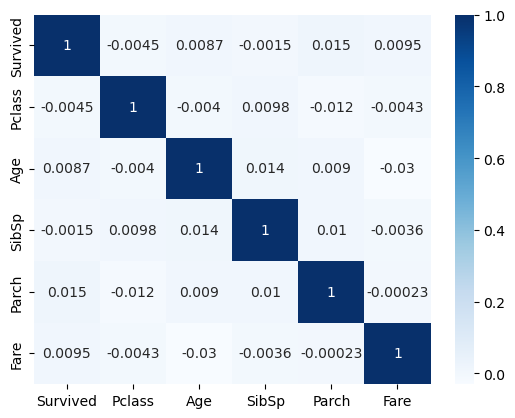

In [62]:
corr_matrix = synthetic_data.corr()

sns.heatmap(corr_matrix, annot= True, cmap = 'Blues')

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

numeric_data = data.select_dtypes(include=[np.number])
numeric_synthetic_data = synthetic_data.select_dtypes(include=[np.number])

orig_cov = np.cov(numeric_data.T)
synthetic_cov = np.cov(numeric_synthetic_data.T)

# Eigen decomposition
eig_vals_orig, eig_vecs_orig = np.linalg.eig(orig_cov)
eig_vals_synthetic, eig_vecs_synthetic = np.linalg.eig(synthetic_cov)

# Create a diagonal matrix of eigenvalues to adjust synthetic data
adjustment = np.diag(eig_vals_orig) @ np.linalg.inv(np.diag(eig_vals_synthetic))

# Adjust synthetic data to match original correlation
adjusted_synthetic_data = numeric_synthetic_data.dot(eig_vecs_synthetic).dot(adjustment).dot(np.linalg.inv(eig_vecs_orig))

# Create a DataFrame for adjusted synthetic numeric data
synthetic_numeric_df = pd.DataFrame(adjusted_synthetic_data, columns=numeric_data.columns)


In [48]:
# Check for NaNs or Infs in the original and synthetic numeric data
print(numeric_data.isnull().sum())
print(numeric_synthetic_data.isnull().sum())
print(np.isinf(numeric_data).sum())
print(np.isinf(numeric_synthetic_data).sum())


Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
Survived    10000
Pclass      10000
Age         10000
SibSp       10000
Parch       10000
Fare        10000
dtype: int64
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
